In [50]:
#Essential libraries for data representation
import pandas as pd
import numpy as np

#Display and plotting libraries
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

#Statistics libraries
from scipy import stats
from collections import Counter

#ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

# For dimension reduction
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA

#DNN libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

In [40]:
df_wine_red = pd.read_csv("wine_quality/winequality-red.csv", sep=";")
df_wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df_wine_white = pd.read_csv("wine_quality/winequality-white.csv", sep=";")
df_wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
# Create a function to map quality scores to labels
def label_quality(quality):
    if quality <= 5:
        return 'low'
    elif quality <= 7:
        return 'medium'
    else:
        return 'high'

# Apply the function to create the new column 'quality_label'
df_wine_red['quality_label'] = df_wine_red['quality'].apply(label_quality)
df_wine_white['quality_label'] = df_wine_white['quality'].apply(label_quality)

# Display the modified dataframes

In [15]:
df_wine_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [16]:
df_wine_white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [20]:
df_wine_red["wine_type"] = "read"
df_wine_white["wine_type"] = "white"

In [22]:
df_wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,read
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,read
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,read
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,read
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,read


In [23]:
df_wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white


In [24]:
df_wine_red.shape

(1599, 14)

In [25]:
df_wine_white.shape

(4898, 14)

In [28]:
# concate 2 dataframe
wines_df = pd.concat([df_wine_red, df_wine_white], ignore_index=True)

# Shuffle the rows of the wines_df dataframe
wines_df = shuffle(wines_df)

In [29]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
3350,6.7,0.16,0.28,2.5,0.046,40.0,153.0,0.99210,3.38,0.51,11.4,7,medium,white
145,8.1,0.67,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5,low,read
2912,9.2,0.32,0.42,1.3,0.046,14.0,186.0,0.99490,3.08,0.48,9.6,5,low,white
4106,7.1,0.34,0.31,5.2,0.032,36.0,140.0,0.99166,3.35,0.47,12.3,7,medium,white
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,high,read


### Task 2

In [30]:
wines_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [33]:
# Task 2.1
wine_types = wines_df['wine_type'].unique()

for wine_type in wine_types:
    subset = wines_df[wines_df['wine_type'] == wine_type]
    print(f"\nDescriptive statistics for {wine_type} wine:")
    print(subset[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']].describe())



Descriptive statistics for white wine:
       residual sugar  total sulfur dioxide    sulphates      alcohol  \
count     4898.000000           4898.000000  4898.000000  4898.000000   
mean         6.391415            138.360657     0.489847    10.514267   
std          5.072058             42.498065     0.114126     1.230621   
min          0.600000              9.000000     0.220000     8.000000   
25%          1.700000            108.000000     0.410000     9.500000   
50%          5.200000            134.000000     0.470000    10.400000   
75%          9.900000            167.000000     0.550000    11.400000   
max         65.800000            440.000000     1.080000    14.200000   

       volatile acidity      quality  
count       4898.000000  4898.000000  
mean           0.278241     5.877909  
std            0.100795     0.885639  
min            0.080000     3.000000  
25%            0.210000     5.000000  
50%            0.260000     6.000000  
75%            0.320000     6

In [35]:
# Task 2.2
quality_labels = wines_df['quality_label'].unique()

for quality_label in quality_labels:
    subset = wines_df[wines_df['quality_label'] == quality_label]
    print(f"\nDescriptive statistics for {quality_label} quality wine:")
    print(subset[['alcohol', 'volatile acidity', 'pH', 'quality']].describe())



Descriptive statistics for medium quality wine:
           alcohol  volatile acidity           pH      quality
count  3915.000000       3915.000000  3915.000000  3915.000000
mean     10.807612          0.306955     3.220577     6.275607
std       1.201098          0.139826     0.160674     0.446877
min       8.400000          0.080000     2.720000     6.000000
25%       9.800000          0.210000     3.110000     6.000000
50%      10.800000          0.270000     3.210000     6.000000
75%      11.700000          0.360000     3.330000     7.000000
max      14.200000          1.040000     4.010000     7.000000

Descriptive statistics for low quality wine:
           alcohol  volatile acidity           pH      quality
count  2384.000000       2384.000000  2384.000000  2384.000000
mean      9.873544          0.397410     3.214522     4.884228
std       0.841746          0.187971     0.161311     0.357197
min       8.000000          0.100000     2.740000     3.000000
25%       9.300000     

In [37]:
# Task 2.3
from scipy.stats import f_oneway

# Extract subsets for each quality label
low_quality = wines_df[wines_df['quality_label'] == 'low']
medium_quality = wines_df[wines_df['quality_label'] == 'medium']
high_quality = wines_df[wines_df['quality_label'] == 'high']

# Perform one-way ANOVA for pH
pH_anova = f_oneway(low_quality['pH'], medium_quality['pH'], high_quality['pH'])
print(f"\nOne-way ANOVA results for pH:\n{pH_anova}")

# Perform one-way ANOVA for alcohol
alcohol_anova = f_oneway(low_quality['alcohol'], medium_quality['alcohol'], high_quality['alcohol'])
print(f"\nOne-way ANOVA results for alcohol:\n{alcohol_anova}")


One-way ANOVA results for pH:
F_onewayResult(statistic=1.2363860803545201, pvalue=0.2905002779768688)

One-way ANOVA results for alcohol:
F_onewayResult(statistic=673.0745347231032, pvalue=2.2715337450621843e-266)


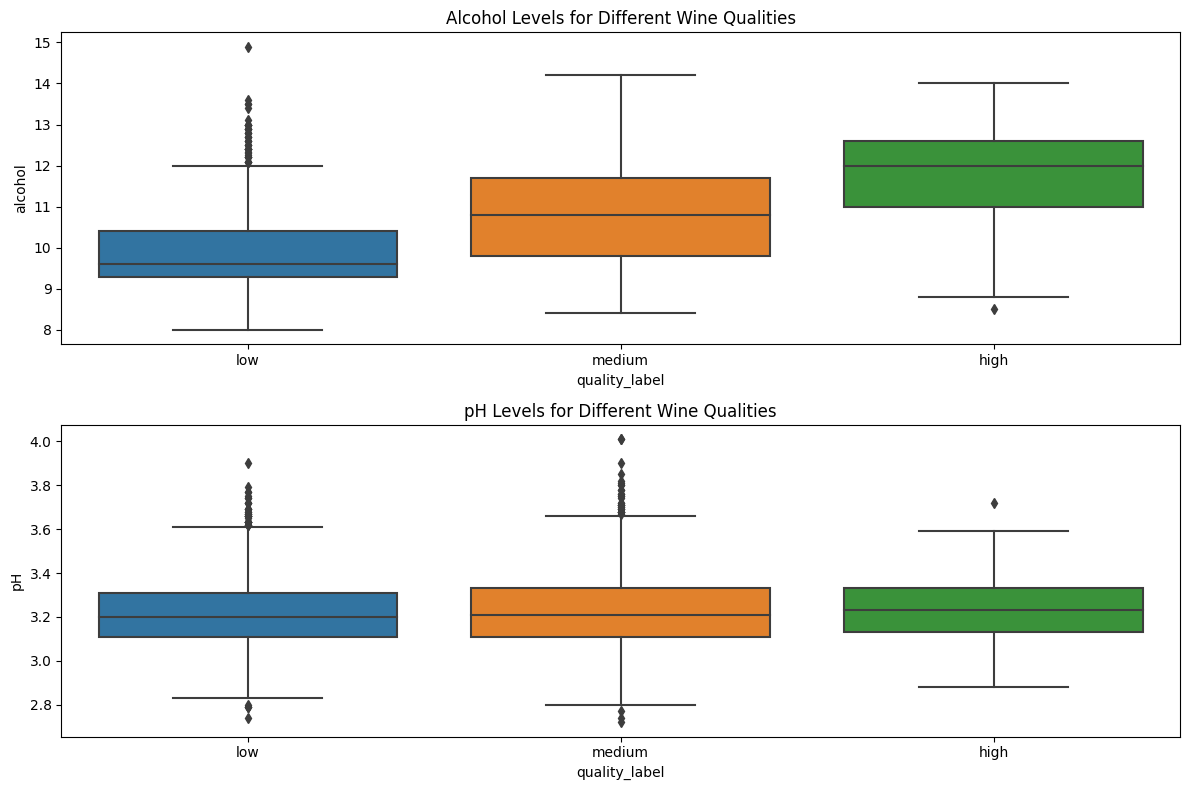

In [51]:
# Task 4
# Visualize alcohol and pH levels using boxplots
plt.figure(figsize=(12, 8))

# Boxplot for alcohol levels
plt.subplot(2, 1, 1)
sns.boxplot(x='quality_label', y='alcohol', data=wines_df, order=['low', 'medium', 'high'])
plt.title('Alcohol Levels for Different Wine Qualities')

# Boxplot for pH levels
plt.subplot(2, 1, 2)
sns.boxplot(x='quality_label', y='pH', data=wines_df, order=['low', 'medium', 'high'])
plt.title('pH Levels for Different Wine Qualities')

plt.tight_layout()
plt.show()


In [45]:
wines_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

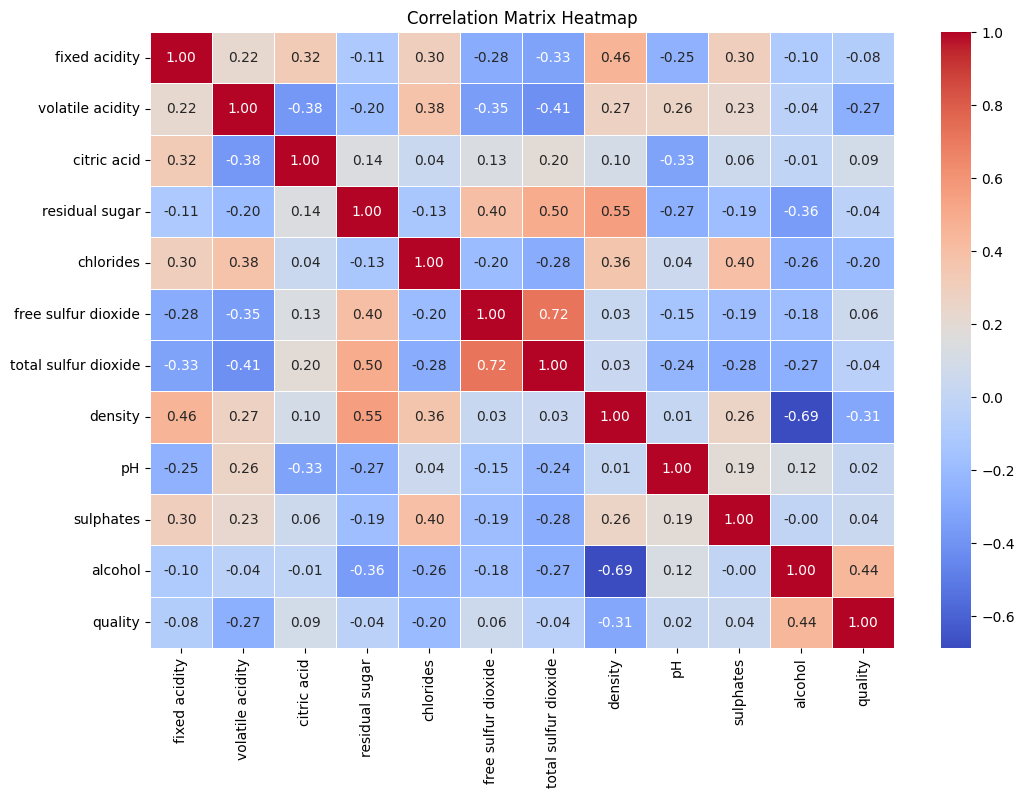

In [47]:
# Task 2.5

# Build the correlation matrix
correlation_matrix = wines_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

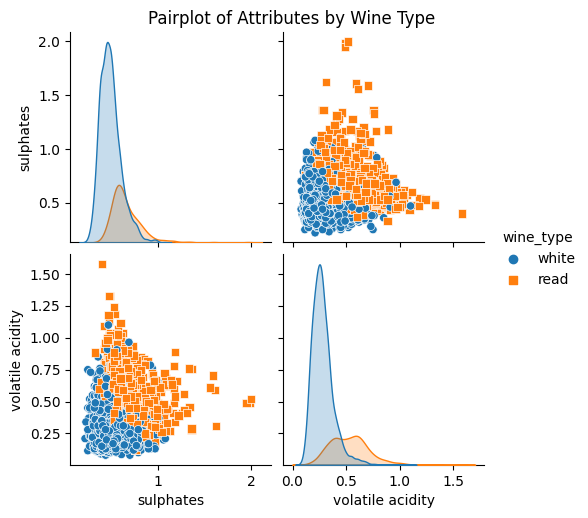


Statements:
There are higher sulphate levels in white wines as compared to red wines: False
Lower sulphate levels in wines with high-quality ratings: True
Lower levels of volatile acids in wines with high-quality ratings: True
There are lower volatile acid levels in red wines as compared to white wines: False


In [52]:
# Task 2.6
# Visualize patterns between the specified attributes using pairplot
sns.pairplot(wines_df, vars=['sulphates', 'volatile acidity'], hue='wine_type', markers=["o", "s"])
plt.suptitle('Pairplot of Attributes by Wine Type', y=1.02)
plt.show()

# Check the statements
white_sulphates_higher = wines_df[wines_df['wine_type'] == 'white']['sulphates'].mean() > wines_df[wines_df['wine_type'] == 'red']['sulphates'].mean()
high_quality_low_sulphates = wines_df[wines_df['quality_label'] == 'high']['sulphates'].mean() < wines_df[wines_df['quality_label'] == 'medium']['sulphates'].mean()
high_quality_low_volatile_acidity = wines_df[wines_df['quality_label'] == 'high']['volatile acidity'].mean() < wines_df[wines_df['quality_label'] == 'medium']['volatile acidity'].mean()
red_wines_lower_volatile_acidity = wines_df[wines_df['wine_type'] == 'red']['volatile acidity'].mean() < wines_df[wines_df['wine_type'] == 'white']['volatile acidity'].mean()

print("\nStatements:")
print(f"There are higher sulphate levels in white wines as compared to red wines: {white_sulphates_higher}")
print(f"Lower sulphate levels in wines with high-quality ratings: {high_quality_low_sulphates}")
print(f"Lower levels of volatile acids in wines with high-quality ratings: {high_quality_low_volatile_acidity}")
print(f"There are lower volatile acid levels in red wines as compared to white wines: {red_wines_lower_volatile_acidity}")
